In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 分析の概要と目的
元データ : http://lib.stat.cmu.edu/datasets/boston_corrected.txt  
参考 : https://nowosad.github.io/spData/reference/boston.html

data4はボストンの住宅価格のデータである.本分析では,住宅価格`CMEDV`の予測のために次に示す2つを行う.
- 探索的データ分析
- 重回帰分析

## 探索的データ分析

In [5]:
df = pd.read_csv("data4.csv")
df.head()

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,...,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,...,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,...,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
# データ数,カラム,欠損値の把握
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OBS.     506 non-null    int64  
 1   TOWN     506 non-null    object 
 2   TOWN#    506 non-null    int64  
 3   TRACT    506 non-null    int64  
 4   LON      506 non-null    float64
 5   LAT      506 non-null    float64
 6   MEDV     506 non-null    float64
 7   CMEDV    506 non-null    float64
 8   CRIM     506 non-null    float64
 9   ZN       506 non-null    float64
 10  INDUS    506 non-null    float64
 11  CHAS     506 non-null    int64  
 12  NOX      506 non-null    float64
 13  RM       506 non-null    float64
 14  AGE      506 non-null    float64
 15  DIS      506 non-null    float64
 16  RAD      506 non-null    int64  
 17  TAX      506 non-null    int64  
 18  PTRATIO  506 non-null    float64
 19  B        506 non-null    float64
 20  LSTAT    506 non-null    float64
dtypes: float64(14), 

各カラムの意味は次の通りである.
- CRIM : 人口1人当たりの犯罪発生数
- ZN : 25000平方フィート以上の住宅区画の占める割合
- INDUS : 小売業以外の商業が占める面積の割合
- CHAS : チャールズ川によるダミー変数(1:川の周辺,0:それ以外)
- NOX : Noxの濃度
- RM : 住宅の平均部屋数
- AGE : 1940年より前に建てられた物件の割合
- DIS : 5つのボストン市の雇用施設からの距離(重み付け済み)
- RAD : 環状高速道路へのアクセスのしやすさ
- TAX : 1000ドルあたいの不動産税率の統計
- PARATIO : 町毎の児童と教師の割合
- B : 町毎の黒人(Bk)の比率を$1000(Bk-0.63)^2$で表したもの
- LSTAT : 給与の低い職業に従事する人口の割合

In [7]:
# 統計量の把握
df.describe()

,OBS.,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,47.531621,2700.355731,-71.056389,42.216440,22.532806,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,146.213884,27.571401,1380.036830,0.075405,0.061777,9.197104,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,1.000000,0.000000,1.000000,-71.289500,42.030000,5.000000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,127.250000,26.250000,1303.250000,-71.093225,42.180775,17.025000,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,253.500000,42.000000,3393.500000,-71.052900,42.218100,21.200000,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,379.750000,78.000000,3739.750000,-71.019625,42.252250,25.000000,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,506.000000,91.000000,5082.000000,-70.810000,42.381000,50.000000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 重回帰分析

In [30]:
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler

### 全ての変数を用いた重回帰分析

In [31]:
# 前処理
columns = ["OBS.","TOWN","CMEDV"]
y = df["CMEDV"]
X = df.drop(columns=columns)
ss = StandardScaler()
Xtrans = ss.fit_transform(X) # 標準化

model = sm.OLS(y, sm.add_constant(Xtrans))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     9469.
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:20:51   Log-Likelihood:                -356.65
No. Observations:                 506   AIC:                             751.3
Df Residuals:                     487   BIC:                             831.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5289      0.022   1015.394      0.000      22.485      22.572
x1             0.1287      0.053      2.419      0.016       0.024       0.233
x2            -0.1256      0.067     -1.869      0.062      -0.258       0.006
x3            -0.0566      0.028     -2.024      0.044      -0.111      -0.002
x4            -0.0147      0.050     -0.298      0.766      -0.112       0.083
x5             9.0510      0.044    206.731      0.000       8.965       9.137
x6             0.0023      0.030      0.077      0.938      -0.057       0.061
x7             0.0205      0.035      0.590      0.556      -0.048       0.089
x8             0.0131      0.045      0.291      0.771      -0.075       0.102
x9             0.0031      0.024      0.131      0.896      -0.043       0.049
x10           -0.0149      0.051     -0.295      0.768      -0.114       0.084
x11            0.0202      0.034      0.600      0.549      -0.046       0.086
x12            0.0304      0.041      0.748      0.455      -0.049       0.110
x13           -0.0584      0.051     -1.144      0.253      -0.159       0.042
x14           -0.1266      0.078     -1.614      0.107      -0.281       0.028
x15           -0.1548      0.070     -2.202      0.028      -0.293      -0.017
x16            0.0233      0.034      0.692      0.489      -0.043       0.090
x17            0.0012      0.026      0.045      0.964      -0.050       0.053
x18           -0.0999      0.042     -2.364      0.018      -0.183      -0.017
==============================================================================
Omnibus:                      462.750   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216317.622
Skew:                           2.942   Prob(JB):                         0.00
Kurtosis:                     104.121   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


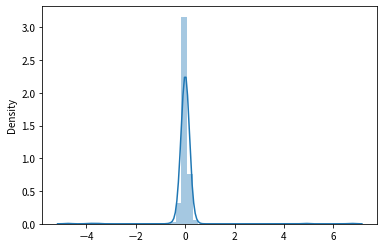

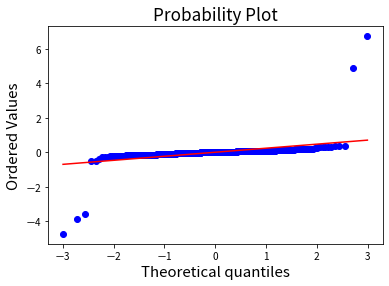

In [42]:
from scipy import stats

# 残差のプロット
resid = results.resid # 残差を取得
# カーネル密度
plt.figure()
sns.distplot(resid)
plt.show()

# 正規QQプロット
plt.figure(facecolor='white')
stats.probplot(resid,dist=stats.norm,plot=plt)
plt.xlabel("Theoretical quantiles",fontsize = 15)
plt.ylabel("Ordered Values",fontsize = 15)
plt.title("Probability Plot",fontsize = 17)
plt.show()

### 結果の解釈
- 自由度調整済み相関係数が0.997であるから,このモデルはデータを99.7%説明できる.
- F検定の結果,このモデルは統計的に有意,つまり意味をもつモデルであることがわかる.
- t検定の結果,有意でない変数がいくつか存在する.
- 条件数が10を超えていることから,説明変数に多重共線性が生じていると考えられる.
- 正規QQプロットから,誤差の分布はほぼ正規分布に従っているといえるが,5つ外れ値があることがわかる.

###  P値が0.05以下の説明変数のみで重回帰分析を行う

In [41]:
extracted = results.pvalues[results.pvalues < 0.05].index
extracted = extracted.drop(["const"])

X = X[["TOWN#","LON","MEDV","TAX","LSTAT"]]
Xtrans = ss.fit_transform(X) # 標準化

model = sm.OLS(y, sm.add_constant(Xtrans))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.402e+04
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:33:22   Log-Likelihood:                -363.80
No. Observations:                 506   AIC:                             739.6
Df Residuals:                     500   BIC:                             765.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5289      0.022   1014.416      0.000      22.485      22.572
x1             0.0963      0.032      3.028      0.003       0.034       0.159
x2            -0.0341      0.024     -1.445      0.149      -0.081       0.012
x3             9.0764      0.034    263.264      0.000       9.009       9.144
x4            -0.1091      0.036     -2.995      0.003      -0.181      -0.038
x5            -0.0630      0.035     -1.794      0.073      -0.132       0.006
==============================================================================
Omnibus:                      501.875   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           259422.676
Skew:                           3.406   Prob(JB):                         0.00
Kurtosis:                     113.717   Cond. No.                         3.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 結果の解釈
- 全ての変数を用いたモデルと決定係数は同じであるがAICが751.3から739.6に減少している.このことから変数を絞ったモデルのほうが良いモデルであることがわかる.
- 条件数が12.9から3.41に減少している.このことから変数を絞ることで,多重共線性が解消できたと考える.
- LONとLSTATはt検定の結果から統計的に意味がある変数とは言えない.


## 多重共線性の検出

### 相関行列

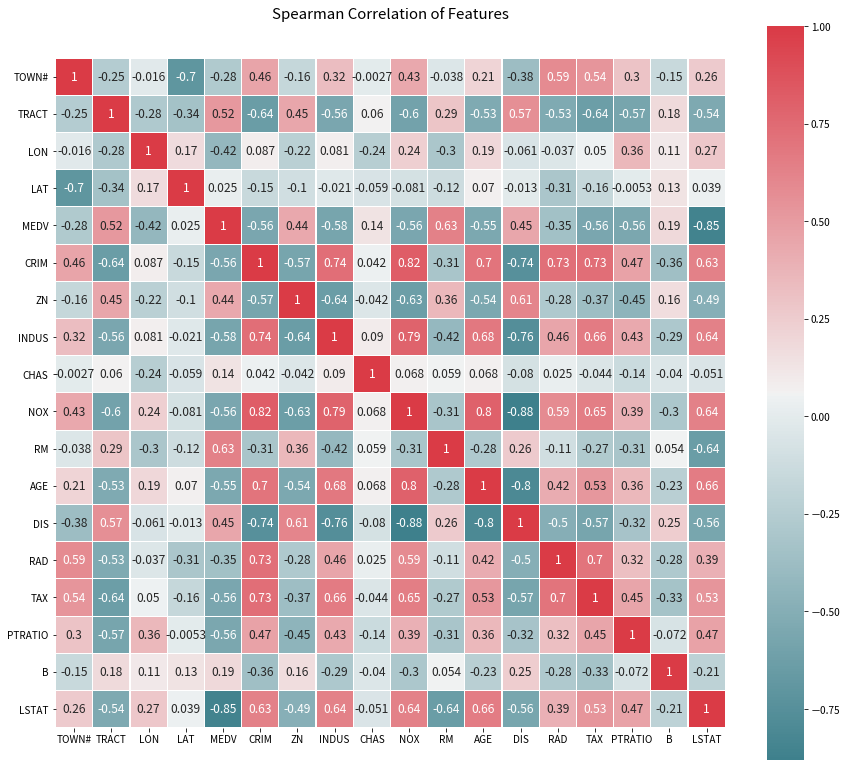

In [46]:
columns = ["OBS.","TOWN","CMEDV"]
X = df.drop(columns=columns)
fig , ax = plt.subplots(figsize =(15, 15),facecolor='white')
colormap = sns.diverging_palette(210,10, as_cmap = True)
corr = X.corr(method='spearman') # pearson spearman kendall
fig = sns.heatmap(
        corr, 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, #めちゃくちゃになったらFalse
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
plt.title('Spearman Correlation of Features', y=1.05, size=15) # pearson spearman kendall
plt.show()

### VIF

In [48]:
# 前処理
columns = ["OBS.","TOWN","CMEDV"]
y = df["CMEDV"]
X = df.drop(columns=columns)
ss = StandardScaler()
Xtrans = ss.fit_transform(X) # 標準化

model = sm.OLS(y, sm.add_constant(Xtrans))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     9469.
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:45:13   Log-Likelihood:                -356.65
No. Observations:                 506   AIC:                             751.3
Df Residuals:                     487   BIC:                             831.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5289      0.022   1015.394      0.000      22.485      22.572
x1             0.1287      0.053      2.419      0.016       0.024       0.233
x2            -0.1256      0.067     -1.869      0.062      -0.258       0.006
x3            -0.0566      0.028     -2.024      0.044      -0.111      -0.002
x4            -0.0147      0.050     -0.298      0.766      -0.112       0.083
x5             9.0510      0.044    206.731      0.000       8.965       9.137
x6             0.0023      0.030      0.077      0.938      -0.057       0.061
x7             0.0205      0.035      0.590      0.556      -0.048       0.089
x8             0.0131      0.045      0.291      0.771      -0.075       0.102
x9             0.0031      0.024      0.131      0.896      -0.043       0.049
x10           -0.0149      0.051     -0.295      0.768      -0.114       0.084
x11            0.0202      0.034      0.600      0.549      -0.046       0.086
x12            0.0304      0.041      0.748      0.455      -0.049       0.110
x13           -0.0584      0.051     -1.144      0.253      -0.159       0.042
x14           -0.1266      0.078     -1.614      0.107      -0.281       0.028
x15           -0.1548      0.070     -2.202      0.028      -0.293      -0.017
x16            0.0233      0.034      0.692      0.489      -0.043       0.090
x17            0.0012      0.026      0.045      0.964      -0.050       0.053
x18           -0.0999      0.042     -2.364      0.018      -0.183      -0.017
==============================================================================
Omnibus:                      462.750   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216317.622
Skew:                           2.942   Prob(JB):                         0.00
Kurtosis:                     104.121   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

num_cols = model.exog.shape[1] # 説明変数の列数
vifs = [vif(model.exog, i) for i in range(0, num_cols)]

pd.DataFrame(vifs, index=model.exog_names, columns=['VIF']).sort_values("VIF",ascending=False)

,VIF
x14,12.509599
x15,10.042527
x2,9.174417
x1,5.749740
x13,5.291795
x10,5.192398
x4,4.978125
x8,4.113420
x5,3.893815
x18,3.627331
